In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib import gridspec
from matplotlib.lines import Line2D
import random
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 100)

In [2]:
# THE FOLLOWING AUTHOR STUDIES HAVE REPORTED SELECT FEATURES:
# MTBLS253 - 35
# MTBL279 - 199
# MTBLS358 - 219 - targeted
# MTBLS579 - 198
# ST000284 - 113
# ST000355/6 - 227/272
# ST000383 - 106
# ST000888 - 95
# ST000918 - 77
# MAYBE:
# ST000450 - 421 - best so far
# ST000608 - 422

In [3]:
def df_naming_cleanup(df):
    fixes = {'autoimmune': 'rheumatologic', 'glomerular':'renal', 'metabolic':'endocrine',
             'neurological':'Neuro/Neuropsychiatric', 
             'minimal change disease, focal segmental sclerosis':'minimal change disease, focal segmental sclerosis, healthy',
             'Alzheimers':"alzheimer's", 
             'Stability of dried blood samples - diabetic men':'diabetic men (long sample storage)',
             'lung cancer - non-small-cell lung cancer (adenocarcinoma, etc)': 'lung cancer', 
             'lung cancer - adenocarcinoma':'lung cancer',
             'scleroderma PAH': 'Pulmonary Artery Hypertension in Scleroderma',
             'Obesity - Non-diabetic and T2 diabetic': 't2 diabetes'
             }
    df = df.replace(fixes)
    return df

In [4]:
individual_ds = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
combined_ds = pd.read_csv('./paper_models_csvs_pkls/combined_summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.csv')
combined_ds = combined_ds.drop(columns='disease_type')
combined_metadata = pd.read_csv('combined_ds_metadata.csv')
combined_ds = combined_ds.merge(combined_metadata, on='analysis')
# lr_combined_ds = lr_combined_ds.rename(index=str, columns={"auc": "combined_auc", "auc_std": "combined_auc_std"})
combined_and_indiv = individual_ds.append(combined_ds)
combined_and_indiv = combined_and_indiv.sort_values('study')
combined_and_indiv = combined_and_indiv.drop(columns=['Unnamed: 0', 'number_labels', 'label'])
combined_and_indiv = df_naming_cleanup(combined_and_indiv)
combined_and_indiv.replace('ST000389', 'ST000388', inplace=True)
combined_and_indiv.replace('ST000063', 'ST000062', inplace=True)
combined_and_indiv

/home/ubuntu/data/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Accession,Instrument_category,Instument,analysis,auc,auc_std,avg_stat_sig_per_model,case,column,control,delta_time,disease,disease_type,features,mode,model_nonzero_coef,samples,significant,study,test_size,time_unit,train_size,type
0,NaN,LC,LTQ orbitrap,serum_onebatch_IPO_align_Feng_serum_all,0.999931,0.000374,1542.0,59,C18,43,2.0,coronary heart disease,cardiovascular,4948,positive,20,102,1542,Feng,19,s,83,plasma
1,NaN,LC,LTQ orbitrap,urine_onebatch_IPO_aligned_Feng_urine_all,0.980264,0.005771,2609.0,59,C18,43,2.0,coronary heart disease,cardiovascular,11715,positive,10202,102,2609,Feng,19,s,83,urine
3,NaN,GC,Agilent 5973 MSD,IPO_aligned_MTBLS105_SIM-MS,0.866343,0.018109,7.0,40,95% dimethyl/5% diphenyl polysiloxane,49,2.0,Hepatocellular carcinoma,cancer,855,positive,10,89,7,MTBLS105,17,s,72,plasma
0,MTBLS105,NaN,NaN,reprocessed_IPO_aligned_MTBLS105_qMS,0.867519,0.024610,3.0,40,NaN,49,NaN,Hepatocellular carcinoma,cancer,2031,NaN,16,89,3,MTBLS105,17,NaN,72,NaN
2,NaN,GC,Agilent 5973 MSD,IPO_aligned_MTBLS105_qMS,0.579000,0.053630,0.0,40,95% dimethyl/5% diphenyl polysiloxane,49,2.0,Hepatocellular carcinoma,cancer,1176,positive,118,89,0,MTBLS105,17,s,72,plasma
4,NaN,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS17_neg_onebatch,0.707484,0.019134,569.0,77,C18,184,2.0,hepatocellular carcinoma,cancer,13652,negative,8635,261,569,MTBLS17,51,s,210,serum
5,NaN,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS17_pos_onebatch,0.720286,0.027246,173.0,77,C18,184,2.0,hepatocellular carcinoma,cancer,20768,positive,20161,261,173,MTBLS17,51,s,210,serum
1,MTBLS17,NaN,NaN,reprocessed_IPO_aligned_MTBLS17_neg_onebatch,0.727557,0.017116,687.0,77,NaN,184,NaN,hepatocellular carcinoma,cancer,34420,NaN,25539,261,687,MTBLS17,51,NaN,210,NaN
2,MTBLS19,NaN,NaN,reprocessed_IPO_aligned_MTBLS19_neg_all_F_R,0.820333,0.033700,573.0,40,NaN,50,NaN,hepatocellular carcinoma,cancer,13786,NaN,7630,90,573,MTBLS19_data,18,NaN,72,NaN
7,NaN,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS19_pos_all_F_R,0.833000,0.029043,300.0,40,C18,50,2.0,hepatocellular carcinoma,cancer,8623,positive,1616,90,300,MTBLS19_data,18,s,72,serum


In [5]:
# GETTING DATA FOR SUMMARY PLOT
to_keep = ['serum_onebatch_IPO_align_Feng_serum_all', 'urine_onebatch_IPO_aligned_Feng_urine_all',
           'reprocessed_IPO_aligned_MTBLS105_qMS', 'ulsam_IPO_reprocessedfirst',
           'reprocessed_IPO_aligned_MTBLS17_neg_onebatch','reprocessed_IPO_aligned_MTBLS19_neg_all_F_R', 
           'm_oxylipin_chronic_hep_b', 'reprocessed_IPO_aligned_MTBLS266_neg', 'author_m_chronic_hep_b_POS',
           'reprocessed_IPO_aligned_MTBLS28_neg', 'reprocessed_IPO_aligned_MTBLS315_mzData',
           'IPO_aligned_MTBLS352_neg_T2D_NGT', 'IPO_aligned_MTBLS352_neg_T2D_Pre-DM', 'IPO_aligned_MTBLS352_neg_NGT_Pre-DM',
           'reprocessed_IPO_aligned_MTBLS354_neg', 'author_m_CER_mass_spectrometry_v4_FS_NS', 
           'author_m_CER_mass_spectrometry_v4_COPD_FS', 'author_m_CER_mass_spectrometry_v4_COPD_CS',
           'author_m_CER_mass_spectrometry_v4_COPD_NS', 'author_m_CER_mass_spectrometry_v4_FS_CS', 
           'author_m_CER_mass_spectrometry_v4_CS_NS','reprocessed_IPO_aligned_MTBLS364_hil_neg',
           'reprocessed_IPO_aligned_MTBLS408_neg', 'm_typhoid_carriage_metabolite_profiling_mass_spectrometry_v2_maf',
           'reprocessed_IPO_aligned_MTBLS72_neg', 'IPO_aligned_MTBLS92', 
           'reprocessed_IPO_aligned_ST000045_2feb_pos_ND_IW', 'reprocessed_IPO_aligned_ST000045_2feb_pos_ND_II', 'reprocessed_IPO_aligned_ST000045_2feb_pos_II_IW',
           'reprocessed_IPO_aligned_ST000046_20120606_neg_hilic_CN_MCI', 'reprocessed_IPO_aligned_ST000046_20120606_neg_hilic_CN_AD',
           'reprocessed_IPO_aligned_ST000046_20120606_neg_hilic_MCI_AD', 'reprocessed_IPO_aligned_ST000046_20120613_neg_hilic_CN_MCI',
           'reprocessed_IPO_aligned_ST000046_20120613_neg_hilic_CN_AD', 'reprocessed_IPO_aligned_ST000046_20120613_neg_hilic_MCI_AD',
           'XCMS-Report-annotated-SingleClass-GCTOF.','XCMS-Report-annotated-SingleClass-GCTOF.plasma',
           'AN000452_Healthy_CRC', 'AN000452_Healthy_Polyp', 'AN000452_CRC_Polyp',
           'reprocessed_IPO_aligned_ST000329_pos_MCD_FSGS', 'reprocessed_IPO_aligned_ST000329_pos_MCD_Control', 'reprocessed_IPO_aligned_ST000329_pos_FSGS_Control',
           'author_AN000580', 'author_AN000582', 'IPO_aligned_ST000381_pos', 'AN000618',  
           'reprocessed_IPO_aligned_ST000385_onebatch_plasma',
           'reprocessed_ST000388', 'reprocessed_IPO_aligned_ST000392_plasma','IPO_aligned_ST000396', 'author_AN000705', 
           'reprocessed_IPO_aligned_ST000578_AE', 'author_AN000929', 
           'reprocessed_IPO_aligned_ST000763_untar_pos_Healthy_PAH', 'reprocessed_IPO_aligned_ST000763_untar_pos_Healthy_Normal Pressures',
           'reprocessed_IPO_aligned_ST000763_untar_pos_Healthy_Borderline Pressures', 'reprocessed_IPO_aligned_ST000763_untar_pos_Healthy_LowRisk',
           'reprocessed_IPO_aligned_ST000763_untar_pos_PAH_Normal Pressures', 'reprocessed_IPO_aligned_ST000763_untar_pos_PAH_Borderline Pressures',
           'reprocessed_IPO_aligned_ST000763_untar_pos_PAH_LowRisk', 'reprocessed_IPO_aligned_ST000763_untar_pos_Normal Pressures_Borderline Pressures',
           'reprocessed_IPO_aligned_ST000763_untar_pos_Normal Pressures_LowRisk', 'reprocessed_IPO_aligned_ST000763_untar_pos_Borderline Pressures_LowRisk',
           'IPO_aligned_ST000865_onebatch', 'AN001450', 'AN001503']

kept = combined_and_indiv.loc[combined_and_indiv['analysis'].isin(to_keep)]
summary_w_metadata = kept
summary_w_metadata = summary_w_metadata[['study','analysis','auc','auc_std','disease', 'disease_type', 'case', 'control', 'samples', 'features', 'significant', 'model_nonzero_coef','Instrument_category']]
summary_w_metadata.to_csv('./pruned_good_models_no_stat_log_reg.csv')
summary_w_metadata
# author only:
# ST000383, ST000450, ST000608, ST000888, ST000918, MTBLS279, MTBLS253, MTBLS358 (targeted), MTBLS579,
# ST000355/356, ST000383, 

,study,analysis,auc,auc_std,disease,disease_type,case,control,samples,features,significant,model_nonzero_coef,Instrument_category
0,Feng,serum_onebatch_IPO_align_Feng_serum_all,0.999931,0.000374,coronary heart disease,cardiovascular,59,43,102,4948,1542,20,LC
1,Feng,urine_onebatch_IPO_aligned_Feng_urine_all,0.980264,0.005771,coronary heart disease,cardiovascular,59,43,102,11715,2609,10202,LC
0,MTBLS105,reprocessed_IPO_aligned_MTBLS105_qMS,0.867519,0.024610,Hepatocellular carcinoma,cancer,40,49,89,2031,3,16,NaN
1,MTBLS17,reprocessed_IPO_aligned_MTBLS17_neg_onebatch,0.727557,0.017116,hepatocellular carcinoma,cancer,77,184,261,34420,687,25539,NaN
2,MTBLS19_data,reprocessed_IPO_aligned_MTBLS19_neg_all_F_R,0.820333,0.033700,hepatocellular carcinoma,cancer,40,50,90,13786,573,7630,NaN
8,MTBLS253,m_oxylipin_chronic_hep_b,0.723852,0.040417,chronic hepatitis B,infectious,67,19,86,35,1,2,LC
3,MTBLS266,reprocessed_IPO_aligned_MTBLS266_neg,0.931111,0.048125,Age related metabolomics,other,15,15,30,36991,122,4301,NaN
4,MTBLS279,author_m_chronic_hep_b_POS,0.926905,0.025173,chronic hepatitis B,infectious,69,19,88,199,67,199,NaN
5,MTBLS28,reprocessed_IPO_aligned_MTBLS28_neg,0.856690,0.005662,Lung cancer,cancer,469,536,1005,9908,3393,9814,NaN
6,MTBLS315,reprocessed_IPO_aligned_MTBLS315_mzData,0.947143,0.021824,non-malaria febrile illness,infectious,34,27,61,59746,128,2964,NaN


In [6]:
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib import gridspec
from matplotlib.lines import Line2D

o_v_o = ['MTBLS352','MTBLS358','ST000045', 'ST000046', 'ST000284', 'ST000329', 'ST000763']
special_numbers = {'MTBLS352':['114/81',98],'MTBLS358':['40/40','40/40'],'ST000045':['7/7',7], 
                   'ST000046':['15/15',15], 'ST000284':['64/76',84], 'ST000329':['11/9',10], 'ST000763':['20/38/44','74/42']}
special_names = {'MTBLS352':'T2D patients/predibetic/NGT',
                   'MTBLS358':'never-smokers/former smokers/smokers/COPD patients',
                   'ST000045':'T1D-II/T1D-IW/No diabetes', 
                   'ST000046':"Alzheimer's/Mild cognitive impairment/normal", 
                   'ST000284':'CRC patients/polyp patients/healthy controls', 
                   'ST000329':'MCD/FSGS/Control', 
                   'ST000763':'Normal/PAH/LowRisk/healthy/Borderline Pressure'}
not_combined = ['Feng', 'ST000046', 'ST000062']
# study_to_dis_type = {s:dis for s, dis in zip(summary_w_metadata.study, summary_w_metadata.disease_type)}
study_spec = {study:'' for study in list(summary_w_metadata.study.unique())}
for study in o_v_o:
    study_spec[study] += '*'
for study in not_combined:
    study_spec[study] += '^'

# sorting the data to get diseases next to each other and then subcategories (cancer types) together
fig_1a_df = summary_w_metadata.sort_values(by=['disease_type'])
fig_1a_df.disease = fig_1a_df.disease.str.lower()

types = fig_1a_df.disease_type.unique()
# print(types)
df_list = []
for dis_type in types:
#     print(fig_1a_df[fig_1a_df.disease_type == dis_type].shape)
    df_list.append(fig_1a_df[fig_1a_df.disease_type == dis_type].sort_values(by=['disease']))
fig_1a_df = pd.concat(df_list)
fig_1a_df = fig_1a_df.reset_index()
# print(fig_1a_df)
types = [ele[0].upper()+ele[1:] for ele in types]
# now need to get the x / y values:
#   x's = the auc values
x = fig_1a_df['auc']

#   y's = turn the study into a number (get a list and enumerate )
study_to_y = fig_1a_df.study.unique()

study_ds = list(fig_1a_df.study)
y_loc = list(range(1,10*len(study_to_y),5))
study_to_num = {study:i for i,study in zip(y_loc,study_to_y)}
y = [study_to_num[study] for study in study_ds]
# old temp labels:
# temp_y_labels = ['{}s_{}'.format(study_spec[study], i+1) for i,study in enumerate(study_to_y)]
df_uni_study = fig_1a_df.drop_duplicates(subset='study')
labels = df_uni_study.disease.tolist()
labels = [ele[0].upper()+ele[1:] for ele in labels]
temp_y_labels = ['{}{}'.format(study_spec[study], disease) for study,disease in zip(study_to_y,labels)]
# newer_temp_lab = []
# for s,t_l in zip(study_to_y, temp_y_labels):
#     dis_type = study_to_dis_type[s]
#     newer_temp_lab.append(t_l + '-{}{}'.format(dis_to_let_num[dis_type][0],dis_to_let_num[dis_type][1]))
#     dis_to_let_num[dis_type][1] += 1
# temp_y_labels = newer_temp_lab
updated_names = {'*Copd':'*COPD', 'Malaria (p. vivax)': 'Malaria (P. vivax)'}
y_labs = []
for ele in temp_y_labels:
    if ele in updated_names:
        y_labs.append(updated_names[ele])
    else:
        y_labs.append(ele)
temp_y_labels = y_labs


# need the shape of the marker
names = list(fig_1a_df.analysis)
shapes = ['o' if ('IPO' in name or 'XCMS' in name or 'reprocessed' in name) else '>'for name in names]

# need the color of the marker - list of numbers where a number is the same for all disease_types
disease_types_unique = fig_1a_df.disease_type.unique()
color_fractions = {i:int(i)/(len(disease_types_unique)-1) for i in range(len(disease_types_unique))}
disease_types = list(fig_1a_df.disease_type)
disease_to_num = {disease:i for i,disease in enumerate(disease_types_unique)}
colors = [disease_to_num[disease] for disease in disease_types]
cmap = matplotlib.cm.get_cmap('rainbow')
# colors for legend
disease_to_color_legend = [(disease,cmap(color_fractions[disease_to_num[disease]])) for disease in disease_to_num]
legend_data = [['Author data', 'k', 'k', '>'],
               ['Reprocessed data', 'k', 'k', 'o']]
for ele in disease_to_color_legend[::-1]:
    legend_data.append([ele[0][0].upper()+ele[0][1:], ele[1], 'k','s'])
patches_bar = []
for ele in legend_data:
    patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=10))
    
# colors for plotting
colors = [cmap(color_fractions[ele]) for ele in colors]

# get the train / test sizes for the bar chart
min_fig_1a_df = fig_1a_df.drop_duplicates('study')
case = list(min_fig_1a_df.case)
control = list(min_fig_1a_df.control)
for i, s_ca_co in enumerate(zip(list(min_fig_1a_df.study),case,control)): 
    if s_ca_co[0] in special_numbers:
        case[i] = special_numbers[s_ca_co[0]][0]
        control[i] = special_numbers[s_ca_co[0]][1]

#get the colors for the bar plot:
bar_disease_types = list(min_fig_1a_df.disease_type)
bar_colors = [disease_to_num[disease] for disease in bar_disease_types]
bar_colors = [cmap(color_fractions[ele]) for ele in bar_colors]

# min_fig_1a_df

/home/ubuntu/data/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


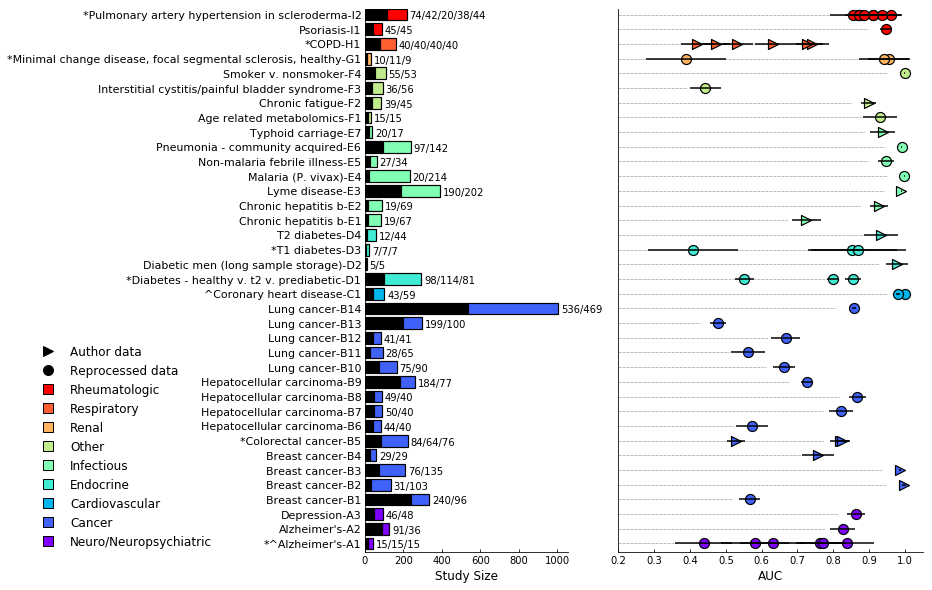

In [7]:
# making the publication plot of auc v study. 
def get_biggest_study_auc(xs,ys):
    x_line, y_line = [], []
    best_x_for_y = {i:0 for i in set(ys)}
    for x_, y_ in zip(xs,ys):
        if x_ > best_x_for_y[y_]:
            best_x_for_y[y_] = x_
    for k,v in sorted(best_x_for_y.items()):
        x_line.append(v)
        y_line.append(k)
    return x_line, y_line

label_ID = ['A1','A2','A3','B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13','B14','C1',
            'D1','D2','D3','D4','E1','E2','E3','E4','E5','E6','E7','F1','F2','F3','F4','G1','H1','I1','I2']
temp_y_labels = [e1+'-'+e2 for e1, e2 in zip(temp_y_labels,label_ID)]
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3]) 
ax = plt.subplot(gs[1])
ax2 = plt.subplot(gs[0])

# plot the error bars so they are behind
ax.errorbar(x, y, xerr=fig_1a_df['auc_std'], fmt='none', ecolor='k')

# plot the auc data:
for x_,y_,m_,c_ in zip(x,y,shapes,colors): 
    ax.scatter(x_, y_, marker=m_, c=c_, s=100, alpha=1, cmap='rainbow', linewidth=1.2, edgecolor='k')
    
# need to get for each study the farthest point so you draw one dashed line:
line_x,line_y = get_biggest_study_auc(x,y)
for x_, y_ in zip(line_x, line_y):
    ax.plot([0,x_-0.05],[y_,y_], 'k:', linewidth=0.5)
ax.yaxis.set_ticks(np.arange(1, y[-1]+5, 5))
# ax.set_yticklabels(temp_y_labels, fontname='Dejavu Sans', fontsize=11)
ax.set_yticklabels([])

# ax.yaxis.set_ticks_position([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([0.2,1.05])
ax.set_ylim([-2,y[-1]+2])
ax.tick_params(direction='in', left='off')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    tick.label.set_fontproperties('Dejavu Sans')
ax.set_xlabel('AUC', fontname='Dejavu Sans', fontsize=12)

# make legend:
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
lgd = ax2.legend(handles=patches_bar, bbox_to_anchor=(-0.7, 0.40), frameon=False, prop=font)

# make the study size plot:
# ax2 = fig.add_subplot(121)
case_p = []
control_p = []
for ele_c, ele_co in zip(case,control):
    if type(ele_c) == int:
        case_p.append(ele_c)
    else:
        ele_c = ele_c.split('/')
        ele_c = [int(ele) for ele in ele_c]
        ele_c = sum(ele_c)
        case_p.append(ele_c)
    if type(ele_co) == int:
        control_p.append(ele_co)
    else:
        ele_co = ele_co.split('/')
        ele_co = [int(ele) for ele in ele_co]
        ele_co = sum(ele_co)
        control_p.append(ele_co)
        
#### bacause this data set has samples of DBS and serum mixed in one, so 10 if you count both, 5 each with DBS and serum for the same person
case_p[19] = 5      
control_p[19] = 5

p1 = ax2.barh(line_y, control_p, height=4, color='k', linewidth=1.2, edgecolor='k')
p2 = ax2.barh(line_y, case_p, left=control_p, height=4, color=bar_colors, linewidth=1.2, edgecolor='k')

# currently colors is one for each dot..want one for each study. 

ax2.yaxis.set_ticks(np.arange(1, y[-1]+5, 5))
ax2.set_yticklabels(temp_y_labels, fontname='Dejavu Sans', fontsize=11)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim([-2,y[-1]+2])
# ax2.set_xscale('log')
# ax2.set_xlim([1,600])
ax2.tick_params(direction='in', left='off')
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    tick.label.set_fontproperties('Dejavu Sans')
ax2.set_xlabel('Study Size', fontname='Dejavu Sans', fontsize=12)

for control_n,case_n, co_a,c_a, y_val in zip(control_p,case_p,control,case,np.arange(1, y[-1]+5, 5)):
    ### this is only for D2
    if int(case_n) == 5 and int(control_n) == 5:
        ax2.text(int(control_n)+int(case_n)+15, y_val-1.5, '{}/{}'.format(control_n,case_n), fontname='Dejavu Sans', fontsize=10)
    else:
        ax2.text(int(control_n)+int(case_n)+15, y_val-1.5, '{}/{}'.format(co_a,c_a), fontname='Dejavu Sans', fontsize=10)

# plt.tight_layout()
# plt.show()
plt.savefig('Fig1.svg', format='svg', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [8]:
# this is for getting the data when you plot all datasets for one study on a plot. 
### keeping author ONLY if no reprocessed data. 
dataset_names_mask = []
with open('indiv_dataset_names.txt', 'r') as f:
    for line in f:
        line = line.strip()
        dataset_names_mask.append(line)
select_dataset_summary = combined_and_indiv.loc[combined_and_indiv['analysis'].isin(dataset_names_mask)].reset_index()
select_dataset_summary = select_dataset_summary.drop(columns=['index', 'Accession'])
# select_dataset_summary[select_dataset_summary['study']=='ST000389'] = 'ST000388'
select_dataset_summary.replace('ST000389', 'ST000388', inplace=True) # must combine cause they are from the same overall study
select_dataset_summary.replace('ST000063', 'ST000062', inplace=True)
select_dataset_summary

,Instrument_category,Instument,analysis,auc,auc_std,avg_stat_sig_per_model,case,column,control,delta_time,disease,disease_type,features,mode,model_nonzero_coef,samples,significant,study,test_size,time_unit,train_size,type
0,LC,LTQ orbitrap,serum_onebatch_IPO_align_Feng_serum_all,0.999931,0.000374,1542.0,59,C18,43,2.0,coronary heart disease,cardiovascular,4948,positive,20,102,1542,Feng,19,s,83,plasma
1,LC,LTQ orbitrap,urine_onebatch_IPO_aligned_Feng_urine_all,0.980264,0.005771,2609.0,59,C18,43,2.0,coronary heart disease,cardiovascular,11715,positive,10202,102,2609,Feng,19,s,83,urine
2,GC,Agilent 5973 MSD,IPO_aligned_MTBLS105_SIM-MS,0.866343,0.018109,7.0,40,95% dimethyl/5% diphenyl polysiloxane,49,2.0,Hepatocellular carcinoma,cancer,855,positive,10,89,7,MTBLS105,17,s,72,plasma
3,GC,Agilent 5973 MSD,IPO_aligned_MTBLS105_qMS,0.579000,0.053630,0.0,40,95% dimethyl/5% diphenyl polysiloxane,49,2.0,Hepatocellular carcinoma,cancer,1176,positive,118,89,0,MTBLS105,17,s,72,plasma
4,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS17_neg_onebatch,0.707484,0.019134,569.0,77,C18,184,2.0,hepatocellular carcinoma,cancer,13652,negative,8635,261,569,MTBLS17,51,s,210,serum
5,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS17_pos_onebatch,0.720286,0.027246,173.0,77,C18,184,2.0,hepatocellular carcinoma,cancer,20768,positive,20161,261,173,MTBLS17,51,s,210,serum
6,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS19_pos_all_F_R,0.833000,0.029043,300.0,40,C18,50,2.0,hepatocellular carcinoma,cancer,8623,positive,1616,90,300,MTBLS19_data,18,s,72,serum
7,LC,Waters Q-Tof Premier,IPO_aligned_MTBLS19_neg_all_F_R,0.785750,0.038940,287.0,40,C18,50,2.0,hepatocellular carcinoma,cancer,5163,negative,2043,90,287,MTBLS19_data,18,s,72,serum
8,LC,Agilent 6460 Triple Quadrupole,m_oxylipin_chronic_hep_b,0.723852,0.040417,1.0,67,C18,19,unknown,chronic hepatitis B,infectious,35,negative,2,86,1,MTBLS253,16,unknown,70,serum
9,LC,LTQ Orbitrap,IPO_aligned_MTBLS266_neg,0.930370,0.036168,181.0,15,HILIC,15,2.0,Age related metabolomics,other,15961,negative,940,30,181,MTBLS266,6,s,24,plasma


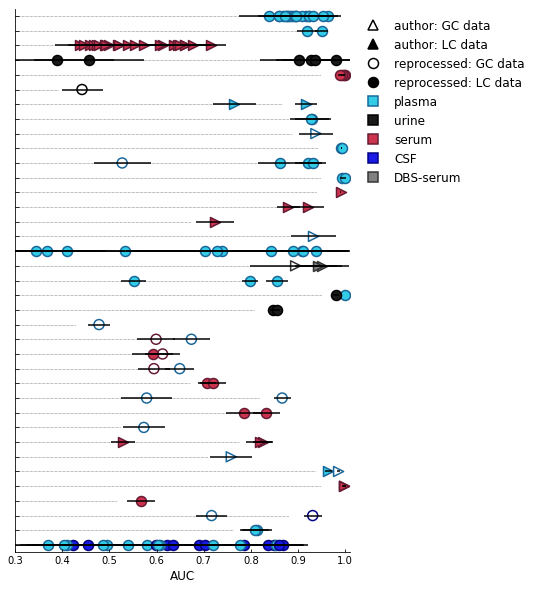

In [9]:
# plot all studies with individual datasets (ie not combined) and mapping on metadata. 
import matplotlib
import matplotlib.font_manager as font_manager

def get_edge_color(c):
    if c == (0.2,0.8,0.9):
        mod = np.asarray([-0.1,-0.4,-0.3])
    if c == (0.1,0.1,0.1):
        mod = np.asarray([-0.1,-0.1,-0.1])
    if c == (0.8,0.2,0.3):
        mod = np.asarray([-0.4,-0.1,-0.1])
    if c == (0.1,0.1,0.9):
        mod = np.asarray([-0.1,-0.1,-0.4])
    if c == (0.5,0.5,0.5):
        mod = np.asarray([-0.3,-0.3,-0.3])
    c = np.asarray(c)
    return tuple(c+mod)

def make_edge_colors(colors):
    new_colors = []
    for c in colors:
        new_colors.append(get_edge_color(c))
    return new_colors
    
def extract_info(single_disease_df, type_to_color):
    # get ys - SAME for all examples in one study
    y_mapper = {study:i+1 for i, study in enumerate(list(single_disease_df['study'].unique()))}
    ys = [y_mapper[study] for study in list(single_disease_df['study'])]
    # get xs - just the AUC values
    xs = list(single_disease_df['auc'])
    # x-error
    xs_err = list(single_disease_df['auc_std'])
    # get the shapes - o for reprocessed, ^ for author
    shapes = ['o' if ('XCMS' in name or 'IPO' in name or 'reprocessed' in name) else '>' for name in list(single_disease_df.analysis)]
    # get the colors - depends on sample type
    colors = [type_to_color[t] for t in list(single_disease_df.type)]
    # get fills - filled for LC, no fill for GC
    # either 'none' or the color of the sample type
    instru_type = list(single_disease_df.Instrument_category)
    fills = [color if instrument == 'LC' else 'none' for color, instrument in zip(colors, instru_type)]
    # get the labels - the specific disease
    single_disease_df_uni_study = single_disease_df.drop_duplicates(subset='study')
    labels = single_disease_df_uni_study.disease
    # get the disease category
    categories = single_disease_df.disease_type.unique()
    colors = make_edge_colors(colors)
    return xs, ys, xs_err, shapes, colors, fills, labels, categories

# map sample types (plasma etc) to a color
sample_types = list(select_dataset_summary.type.unique())
color_list = [(0.2,0.8,0.9), (0.1,0.1,0.1), (0.8,0.2,0.3), (0.1,0.1,0.9), (0.5,0.5,0.5), (0,1,1), (1,1,1)]
type_to_color = {sample:color_list[i] for i,sample in enumerate(sample_types)}

# sorting the data to get diseases next to each other and then subcategories (cancer types) together
dis_plot_df = select_dataset_summary.sort_values(by=['disease_type'])
dis_plot_df.disease = dis_plot_df.disease.str.lower()
types = fig_1a_df.disease_type.unique()
df_list = []
for dis_type in types:
    df_list.append(dis_plot_df[dis_plot_df.disease_type == dis_type].sort_values(by=['disease']))
dis_plot_df = pd.concat(df_list)
dis_plot_df = dis_plot_df.set_index('study')

# sort the df to match the order in the first figure:
def specify_order(df, order = None):
    def iterate_property(prop, studies, df):
        new_order = []
        if prop == 'type':
            prop_to_study = {'serum':[], 'plasma':[], 'DBS-serum':[], 'urine':[]}
        elif prop == 'Instrument_category':
            prop_to_study = {'GC':[], 'LC':[]}
        else:
            prop_to_study = {'positive':[], 'negative':[], 'both':[]}
            
        for s in studies:
            try:
                s_prop = list(set(df.loc[s][prop].tolist()))
            except:
                s_prop = list(set([df.loc[s][prop]]))   
            if prop == 'type':
                if 'urine' in s_prop:
                    prop_to_study['urine'].append(s)
                elif 'serum' in s_prop:
                    prop_to_study['serum'].append(s)
                elif 'plasma' in s_prop:
                    prop_to_study['plasma'].append(s)
                else:
                    prop_to_study['DBS-serum'].append(s)
            elif prop == 'Instrument_category':
                if 'GC' in s_prop:
                    prop_to_study['GC'].append(s)
                elif 'LC' in s_prop:
                    prop_to_study['LC'].append(s)
            else:
                if 'both' in s_prop:
                    prop_to_study['both'].append(s)
                    continue
                elif 'positive' in s_prop and 'negative' not in s_prop:
                    prop_to_study['positive'].append(s)
                    continue
                elif 'negative' in s_prop and 'positive' not in s_prop:
                    prop_to_study['negative'].append(s)
                    continue
                elif 'negative' in s_prop and 'positive' in s_prop:
                    prop_to_study['both'].append(s)
                    continue
                else:
                    print('not working, should probably implement')
        for t in prop_to_study:
            new_order += prop_to_study[t]
        return new_order    
    unique = list(fig_1a_df.study.unique())
    if order == None:
        order = unique
    elif order == 'type':
        order = iterate_property(order, unique, df)
    elif order == 'Instrument_category':
        order = iterate_property(order, unique, df)
    elif order == 'mode':
        order = iterate_property(order, unique, df)
    else:
        print("using default, you didn't put in a valid order: type, instrument or mode")
        order = unique
    return order

#### pick order to arrange the data: 
indiv_order = specify_order(dis_plot_df, order=None)

dis_plot_df = dis_plot_df.loc[indiv_order]
dis_plot_df= dis_plot_df.reset_index()
names_for_later = list(dis_plot_df.analysis)
# ok now i have a ful dataframe i can use to make the single plot in the same order as before

# plotting:
fig = plt.figure(figsize=(6,10))
# gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3]) 
# ax = plt.subplot(gs[1])
# ax2 = plt.subplot(gs[0])
# get all the data to plot:
# print(list(dis_plot_df.analysis))
ax = plt.subplot()
xs, ys, xs_err, shapes, colors, fills, labels, categories = extract_info(dis_plot_df, type_to_color)
ax.get_yaxis().set_ticks([])
ax.set_xlim([0.3,1.01])
ax.set_ylim([0.5,ys[-1]+0.5])
ax.xaxis.set_ticks(np.arange(0.3, 1.1, 0.1))
ax.set_xlabel('AUC', fontname='Dejavu Sans', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(direction='in')

for x_,y_,xerr_,s_,c_,f_ in zip(xs,ys,xs_err,shapes,colors,fills):
    ax.scatter(x_, y_, marker=s_, s=100, alpha=1, linewidth=1.5, facecolors=f_, edgecolor=c_)
    ax.errorbar(x_,y_,xerr=xerr_,ecolor='k',elinewidth=1.5)
ax.yaxis.set_ticks(np.arange(1, len(labels)+1, 1))
ax.set_yticklabels([])

line_x,line_y = get_biggest_study_auc(xs,ys)
for x_, y_ in zip(line_x, line_y):
    ax.plot([0,x_-0.05],[y_,y_], 'k:', linewidth=0.5)

# print(ys, data_num_mat)
# im = ax2.imshow(data_num_mat.values[::-1], cmap='bwr', interpolation='nearest')

# for edge, spine in ax.spines.items():
#     spine.set_visible(True)
# ax2.set_xticks(np.arange(data_num_mat.shape[1]))
# ax2.set_yticks(np.arange(data_num_mat.shape[0]))
# ax2.set_xticklabels(list(analytical_dict.keys()), rotation=90)
# study_order = [study_to_dis[s] for s in study_order]
# ax2.set_yticklabels(study_order[::-1])
# ax2.set_xticks(np.arange(data_num_mat.shape[1]+1)-.504, minor=True)
# ax2.set_yticks(np.arange(data_num_mat.shape[0]+1)-.55, minor=True)
# ax2.grid(which="minor", color="k", linestyle='-', linewidth=1)
# ax2.tick_params(which="minor", bottom=False, left=False)

# #### make the legend:
# cmap = plt.cm.get_cmap('bwr')
# legend_data = []
# for ele in [['positive',0.0],['both',1.0],['negative', 0.65]]:
#     legend_data.append([ele[0], cmap(ele[1]), 'k','s'])
# patches_bar = []
# for ele in legend_data:
#     patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=16))
# font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
# lgd2 = ax2.legend(handles=patches_bar, bbox_to_anchor=(2, 0.6), frameon=False, prop=font)

    

# for tick in ax2.xaxis.get_major_ticks():
#     tick.label.set_fontsize(11)
#     tick.label.set_fontproperties('Dejavu Sans')
# ax2.set_xlabel('Study Size', fontname='Dejavu Sans', fontsize=12)    
# # put the case/control values on the plot    
# for case_n, control_n, y_val in zip(case,control,np.arange(1, ys[-1]+1)):
#     ax2.text(int(case_n)+int(control_n)+15, y_val-0.25, '{}/{}'.format(case_n,control_n), fontname='Dejavu Sans', fontsize=10)
    
# make legend:
legend_data = [['author: GC data', 'none', 'k', '^'],
               ['author: LC data', 'k', 'k', '^'],
               ['reprocessed: GC data', 'none', 'k', 'o'],
               ['reprocessed: LC data', 'k', 'k', 'o']]
for s_type in type_to_color:
    legend_data.append([s_type, type_to_color[s_type], get_edge_color(type_to_color[s_type]),'s'])
patches = []
for ele in legend_data:
    patches.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], markeredgewidth=1.5, label=ele[0], markersize=10))
    
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
lgd = ax.legend(handles=patches, bbox_to_anchor=(1, 1), frameon=False, prop=font)
# plt.show()

plt.savefig('Fig2_b.svg', format='svg', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

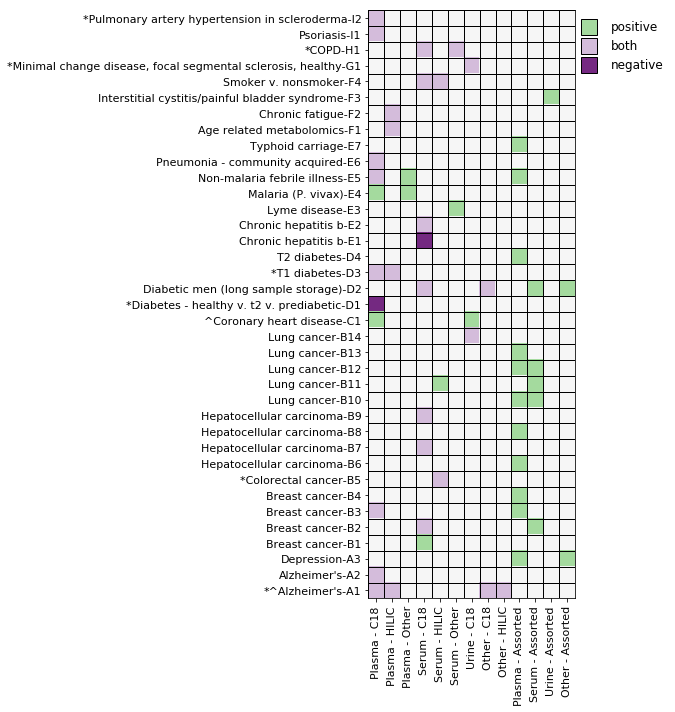

In [78]:
### NOTE: the axis bars dont look right on the notebook, but the saved svg version is correct...
### this is a known issue trying to plot the grid bars with matplotlib...

# Instrument_category, case, column, control, disease, disease_type, type, mode
### cardiovascular, cancer, infectious, other, metabolic, respiratory (1), autoimmune, neurological
### glomerular (1 study)
# combined_and_indiv = select_dataset_summary

combined_indiv_LC = combined_and_indiv[combined_and_indiv['Instrument_category']=='LC']
combined_indiv_GC = combined_and_indiv[combined_and_indiv['Instrument_category']=='GC']

combined_indiv_pos_GC = combined_indiv_GC[combined_indiv_GC['mode']=='positive']
combined_indiv_neg_GC = combined_indiv_GC[combined_indiv_GC['mode']=='negative']
combined_indiv_pos_LC = combined_indiv_LC[combined_indiv_LC['mode']=='positive']
combined_indiv_neg_LC = combined_indiv_LC[combined_indiv_LC['mode']=='negative']
combined_indiv_LC[combined_indiv_LC.disease_type == 'infectious']
# combined_and_indiv[combined_and_indiv['column']=='C18']
# combined_and_indiv[combined_and_indiv['disease_type']=='cancer']


### somehow need to graphically represent this, that most studies are different
### some sort of hierarchical clustering? 
numbered_metadata_df = combined_and_indiv.copy()
numbered_metadata_df = numbered_metadata_df.drop(['Accession', 'Instument', 'auc', 'auc_std', 'case', 'control', 'features', 'model_nonzero_coef', 'samples', 'significant', 'test_size', 'train_size'], axis=1).reset_index()

### what to keep so as not to have duplicates: 
# studies_to_keep = [0,1,6,7,9,8,38,39,42,44,64,65,49,50,66,69,70,67,68,71,72,76,75,73,74,82,77,
#                    78, 83, 80,81,84,79,85, 88,92,93,94,95,96,97,98,124,125,122,123,126,127,128,
#                    129,130,131,132,153,154,149,150,135,136,141,142,159,160,165,168,178,177,171,
#                    184,174, 181,189,190,193,194,195,196,197,201,205,207,209,213,212,215,214,219,
#                    217,216,218,220,226,229,224,223,231,232,233,234,240,235,263,264,266,265,267,
#                    269,270,268,271,273,272,312,302,287,274,314,316,318,319]
#unique_studies = numbered_metadata_df.loc[studies_to_keep]

unique_studies = numbered_metadata_df.copy()
unique_studies = unique_studies.drop(index=[36,37,38,39,41,55])
## turns out there where multiples of certain things so getting rid of unwanted rows:
unique_studies = unique_studies[~pd.isnull(unique_studies.column)] 
# ok now, need to get each study as a row - then columns will be:
#     LC-HILIC-plasma, LC-HILIC-serum, LC-HILIC-other, LC-C18-plasma ... GC-plasma etc
# then the color of the box will be blue for positive and red for negative and an 'A' if author

def update_dict(study_data, analytical_dict):
    if study_data == None:
        return analytical_dict
    new_study_data = []
    for ele in study_data:
        try:
            if ele[0] not in [key[0] for key in new_study_data]:
                new_study_data.append(ele)
            else:
                for ele2 in new_study_data:
                    if ele2[0] == ele[0]:
                        ele2[1] = ele2[1]+'/'+ele[1]
        except:
            pass
    new_study_data_dict = {ele[0]:ele[1] for ele in new_study_data}
    for dict_key in list(analytical_dict.keys()):
        if dict_key in new_study_data_dict:
            analytical_dict[dict_key].append(new_study_data_dict[dict_key])
        else:
            analytical_dict[dict_key].append('')
    return analytical_dict


analytical_dict = {'Plasma - C18':[], 'Plasma - HILIC':[], 'Plasma - Other':[],
                   'Serum - C18':[], 'Serum - HILIC':[], 'Serum - Other':[],
                   'Urine - C18':[], 
                   'Other - C18':[], 'Other - HILIC':[], 
                   'Plasma - Assorted':[],'Serum - Assorted':[],'Urine - Assorted':[], 'Other - Assorted':[]}
study_names = []
# go through the unique_studies df
current_study = None
for i, row in unique_studies.iterrows():
    if row['study'] != current_study:
        if current_study == None:
            pass
        else:
            study_names.append(current_study)
            analytical_dict = update_dict(study_data, analytical_dict)
        current_study = row['study']
        study_data = []
    if row['type'] in ['plasma', 'serum', 'urine']:
        if current_study == 'ST000381':
            if 'AN' in row['analysis']:
                continue
        if row['column'] in ['C18', 'HILIC']:
            key = row['type'] + ' - ' + row['column']
        else:
            if row['Instrument_category'] == 'GC':
                key = row['type'] + ' - Assorted'
            else:
                key = row['type'] + ' - Other'
    else:
        if row['column'] in ['C18', 'HILIC']:
            key = 'Other - ' + row['column']
        else:
            if row['Instrument_category'] == 'GC':
                key = 'Other - Assorted'
            else:
                key = 'Other - Other'
    key = key[0].upper() + key[1:]
    if row['mode'] == 'positive':
        mode = '+'
    elif row['mode'] == 'negative':
        mode = '-'
    elif row['mode'] == 'both':
        mode = '+/-'
    else:
        mode = 'unk'

    if [key, mode] not in study_data:
        study_data.append([key, mode])
    if current_study == 'ST000918':
        study_names.append(current_study)
        analytical_dict = update_dict(study_data, analytical_dict)

unique_studies
        
#### get the correct order to match the other figures
study_to_dis = {s:d for d,s in zip(list(fig_1a_df.disease), list(fig_1a_df.study))}
study_order = list(fig_1a_df.study.unique())
study_order = indiv_order

data_df = pd.DataFrame.from_dict(analytical_dict, orient='columns')
data_df.index = study_names
data_df = data_df.loc[indiv_order]
data_df.loc['ST000388', 'Serum - Assorted'] = '+'
data_df.index = [study_to_dis[s] for s in study_order]
data_df

pos, both, neg = 0.7, 0.35, 0.1
c_map = 'PRGn'
from matplotlib import cm
norm = cm.colors.Normalize(vmax=1, vmin=0)
# c_map = 'PuOr'
data_num_mat = data_df.copy()  
data_num_mat[data_num_mat == '+'] = pos # 0.3 #0
data_num_mat[data_num_mat == '-/+'] = both # 0.85 #1 
data_num_mat[data_num_mat == '+/-'] = both # 0.85 #1
data_num_mat[data_num_mat == '+/+/-'] = both # 0.85 #1
data_num_mat[data_num_mat == '-'] = neg # 0 #0.35
data_num_mat[data_num_mat == ''] = 0.5 #1 #0.5

data_num_mat.loc['diabetic men (long sample storage)','Other - Assorted'] = pos # 0.3 #0
data_num_mat.loc['diabetic men (long sample storage)','Serum - C18'] = both # 0.85#1
data_num_mat.loc['diabetic men (long sample storage)','Serum - Assorted'] = pos # 0.3 # 0
data_num_mat = data_num_mat.astype(float)


### plotting
fig,ax = plt.subplots(figsize=(12,10))
im = ax.imshow(data_num_mat.values[::-1], cmap=c_map, interpolation='nearest', norm=norm)

for edge, spine in ax.spines.items():
    spine.set_visible(True)
ax.set_xticks(np.arange(data_num_mat.shape[1]))
ax.set_yticks(np.arange(data_num_mat.shape[0]))
ax.set_xticklabels(list(analytical_dict.keys()), rotation=90,fontname='Dejavu Sans', fontsize=11)
study_order = [study_to_dis[s] for s in study_order]
study_order = [s[0].upper()+s[1:] for s in study_order]
updated_names = {'Copd':'*COPD'}
y_labs = []
for ele in study_order:
    if ele in updated_names:
        y_labs.append(updated_names[ele])
    else:
        y_labs.append(ele)
study_order = y_labs

ax.set_yticklabels(temp_y_labels[::-1], fontname='Dejavu Sans', fontsize=11)
ax.set_xticks(np.arange(data_num_mat.shape[1]+1)-0.5, minor=True)
ax.set_yticks(np.arange(data_num_mat.shape[0]+1)-0.5, minor=True)
ax.grid(which="minor", color="k", linestyle='-', linewidth=1.0)
ax.tick_params(which="minor", bottom=False, left=False)

#### make the legend:
cmap = plt.cm.get_cmap(c_map) #bwr
legend_data = []
for ele in [['positive',pos],['both', both],['negative', neg]]: #0, 1, 0.35
    legend_data.append([ele[0], cmap(ele[1]), 'k','s'])
patches_bar = []
for ele in legend_data:
    patches_bar.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], label=ele[0], markersize=16))
font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
lgd = ax.legend(handles=patches_bar, bbox_to_anchor=(1.48, 1), frameon=False, prop=font)
plt.tight_layout()
plt.savefig('Fig2_a.svg', format='svg', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

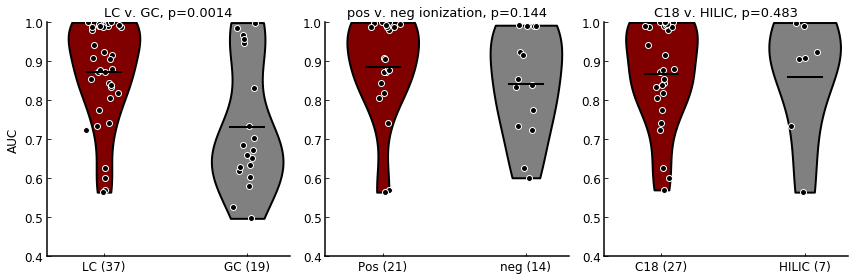

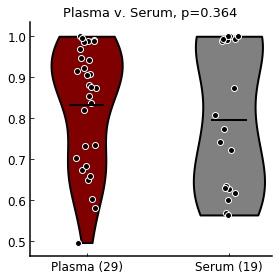

In [11]:
# MUST run the cell above...
# calc stat significance of the GC v LC and a few others. 
from scipy.stats import mannwhitneyu
base_data = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_plsda_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def set_plot_features(ax, parts):
    for i, pc in enumerate(parts['bodies']):
        if i == 0:
            pc.set_facecolor((0.5, 0.0, 0.0, 0.7))
        else:
            pc.set_facecolor((0.5, 0.5, 0.5, 0.7))
        pc.set_linewidth(2)
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    for partname in ['cmeans']:
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(direction='in')
    for tick in ax.get_yticklabels():
        tick.set_fontname("Dejavu Sans")
        tick.set_fontsize(12)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

multis = ['ST000763', 'ST000329','ST000045', 'ST000046','MTBLS358', 'ST000284', 'MTBLS352']
for ele in multis:
    base_data = base_data[base_data.study != ele]

summary_w_auc = base_data
summary_w_auc = summary_w_auc.set_index('analysis')
# print(summary_w_auc[summary_w_auc.Instrument_category == 'GC'])
# print(summary_w_auc)
# Looking at all the datasets together (comment out specific rows below)
indexes = list(summary_w_auc.index)
author = []
reprocessed = []
for ind in indexes:
    if 'IPO' in ind or 'XCMS' in ind or 'reprocessed' in ind:
        reprocessed.append(ind)
    else:
        author.append(ind)
analysis_type = 'All'
##### to look at just the author data use:
# summary_w_auc = summary_w_auc.loc[author]
# analysis_type = 'Author'

###### to look at just the reprocessed data use:
# summary_w_auc = summary_w_auc.loc[reprocessed]
# analysis_type = 'Reprocessed'

category = summary_w_auc.Instrument_category
column = summary_w_auc.column
mode = summary_w_auc['mode'].replace({np.nan:'NaN'})

fig = plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
ax = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
    
#look at LC v GC studies via violoin plot:
lc_auc = list(summary_w_auc[summary_w_auc.Instrument_category=='LC']['auc'])
gc_auc = list(summary_w_auc[summary_w_auc.Instrument_category=='GC']['auc'])
# get just the LC data:
summary_w_auc_LC = summary_w_auc[summary_w_auc.Instrument_category=='LC']
data = [lc_auc, gc_auc]
_, p = mannwhitneyu(lc_auc, gc_auc)
ax.set_xlim([0.6, 2.3])
random_x_1 = np.random.normal(scale=0.05, size=len(lc_auc)) + 1 
random_x_2 = np.random.normal(scale=0.05, size=len(gc_auc)) + 2 

ax.set_ylim([0.4,1])
ax.xaxis.set_ticks(np.arange(1, 3, 1))
parts = ax.violinplot(data, [1,2], widths=0.5, showmeans=True, showextrema=False)
set_plot_features(ax, parts)
ax.set_title('LC v. GC, p={:4.4f}'.format(p), fontname='Dejavu Sans', fontsize=13)
ax.set_xticklabels(['LC ({})'.format(len(lc_auc)), 'GC ({})'.format(len(gc_auc))], rotation=0, fontname='Dejavu Sans', fontsize=12)
ax.set_ylabel('AUC', fontname='Dejavu Sans', fontsize=12)
ax.scatter(random_x_1,lc_auc, facecolor='k', edgecolor='w')
ax.scatter(random_x_2, gc_auc,facecolor='k', edgecolor='w')

# #look at pos v neg studies via violin plot:
pos_auc = summary_w_auc_LC[summary_w_auc_LC['mode']=='positive']['auc']
neg_auc = summary_w_auc_LC[summary_w_auc_LC['mode']=='negative']['auc']
# print(summary_w_auc[summary_w_auc['mode']=='positive'])
_, p = mannwhitneyu(pos_auc, neg_auc)
data = [pos_auc, neg_auc]
ax1.set_xlim([0.6, 2.3])
ax1.set_ylim([0.4,1])
ax1.xaxis.set_ticks(np.arange(1, 3, 1))
parts = ax1.violinplot(data, [1,2], widths=0.5, showmeans=True, showextrema=False)
#, labels=['LC (%.2f)'%lc_auc.mean(), 'GC (%.2f)'%gc_auc.mean()])
set_plot_features(ax1, parts)
ax1.set_title('pos v. neg ionization, p={:4.3f}'.format(p), fontname='Dejavu Sans', fontsize=13)
ax1.set_xticklabels(['Pos ({})'.format(len(pos_auc)), 'neg ({})'.format(len(neg_auc))], rotation=0, fontname='Dejavu Sans', fontsize=12)
random_x_1 = np.random.normal(scale=0.05, size=len(pos_auc)) + 1 
random_x_2 = np.random.normal(scale=0.05, size=len(neg_auc)) + 2 
ax1.scatter(random_x_1,pos_auc, facecolor='k', edgecolor='w')
ax1.scatter(random_x_2, neg_auc,facecolor='k', edgecolor='w')

#look at C18 v hilic studies via violin plot:
C18_auc = summary_w_auc_LC[summary_w_auc_LC['column']=='C18']['auc']
HILIC_auc = summary_w_auc_LC[summary_w_auc_LC['column']=='HILIC']['auc']
_, p = mannwhitneyu(C18_auc, HILIC_auc)
data = [C18_auc, HILIC_auc]
ax2.set_xlim([0.6, 2.3])
ax2.set_ylim([0.4,1])
ax2.xaxis.set_ticks(np.arange(1, 3, 1))
parts = ax2.violinplot(data, [1,2], widths=0.5, showmeans=True, showextrema=False)
#, labels=['LC (%.2f)'%lc_auc.mean(), 'GC (%.2f)'%gc_auc.mean()])
set_plot_features(ax2, parts)
ax2.set_title('C18 v. HILIC, p={:4.3f}'.format(p), fontname='Dejavu Sans', fontsize=13)
ax2.set_xticklabels(['C18 ({})'.format(len(C18_auc)), 'HILIC ({})'.format(len(HILIC_auc))], rotation=0, fontname='Dejavu Sans', fontsize=12)
random_x_1 = np.random.normal(scale=0.05, size=len(C18_auc)) + 1 
random_x_2 = np.random.normal(scale=0.05, size=len(HILIC_auc)) + 2 
ax2.scatter(random_x_1,C18_auc, facecolor='k', edgecolor='w')
ax2.scatter(random_x_2, HILIC_auc,facecolor='k', edgecolor='w')

plt.tight_layout()
plt.savefig('Figure_2_{}_conditions.svg'.format(analysis_type), format='svg', dpi=1000, bbox_inches='tight')
plt.show()


######### SI ############3
#look at plasma v serum studies via violin plot:
fig = plt.figure(figsize=(4,4))
ax2 = plt.subplot()

plasma_auc = summary_w_auc[summary_w_auc['type']=='plasma']['auc']
serum_auc = summary_w_auc[summary_w_auc['type']=='serum']['auc']
_, p = mannwhitneyu(plasma_auc, serum_auc)
data = [plasma_auc, serum_auc]
ax2.set_xlim([0.6, 2.3])
# ax2.set_ylim([0.4,1])
ax2.xaxis.set_ticks(np.arange(1, 3, 1))
parts = ax2.violinplot(data, [1,2], widths=0.5, showmeans=True, showextrema=False)
#, labels=['LC (%.2f)'%lc_auc.mean(), 'GC (%.2f)'%gc_auc.mean()])
set_plot_features(ax2, parts)
ax2.set_title('Plasma v. Serum, p={:4.3f}'.format(p), fontname='Dejavu Sans', fontsize=13)
ax2.set_xticklabels(['Plasma ({})'.format(len(plasma_auc)), 'Serum ({})'.format(len(serum_auc))], rotation=0, fontname='Dejavu Sans', fontsize=12)
random_x_1 = np.random.normal(scale=0.05, size=len(plasma_auc)) + 1 
random_x_2 = np.random.normal(scale=0.05, size=len(serum_auc)) + 2 
ax2.scatter(random_x_1,plasma_auc, facecolor='k', edgecolor='w')
ax2.scatter(random_x_2,serum_auc,facecolor='k', edgecolor='w')

plt.tight_layout()
plt.savefig('SI_Figure_2_{}_conditions.svg'.format(analysis_type), format='svg', dpi=1000, bbox_inches='tight')
plt.show()

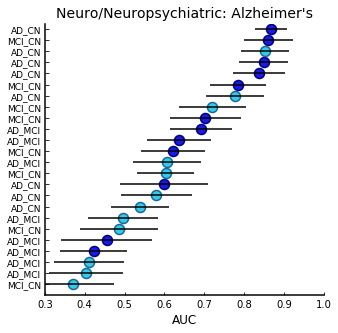

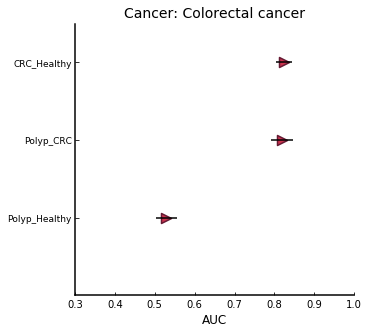

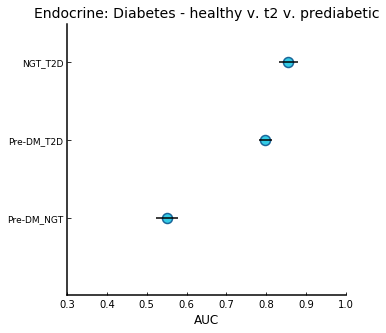

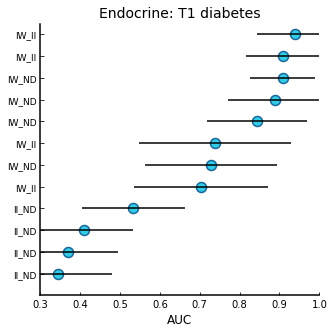

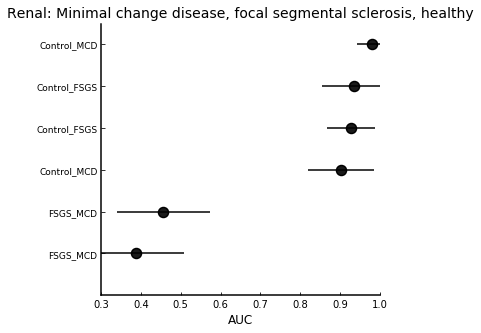

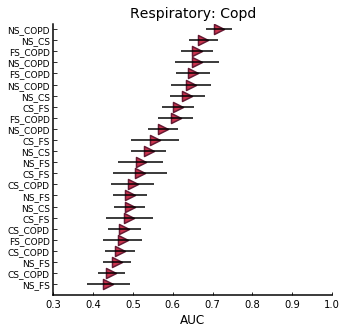

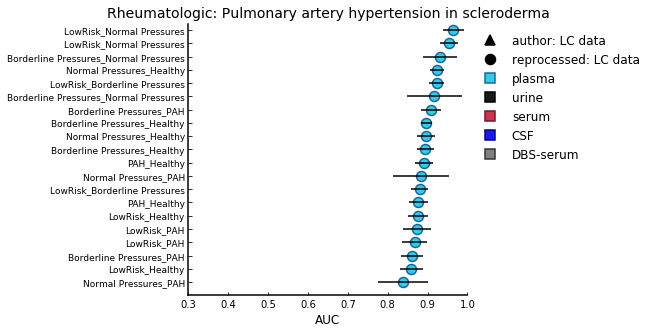

In [12]:
# looking at and plotting diseases independently with mapping the o-v-o labels

def extract_info(single_disease_df, type_to_color):
    # get xs - just the AUC values
    xs = list(single_disease_df['auc'])
    # get ys - SAME for all examples in one study
    ys = [i+1 for i in range(len(xs))]
    # x-error
    xs_err = list(single_disease_df['auc_std'])
    # get the shapes - o for reprocessed, ^ for author
    shapes = ['o' if ('XCMS' in name or 'IPO' in name or 'reprocessed' in name) else '>' for name in list(single_disease_df.analysis)]
    # get the colors - depends on sample type
    colors = [type_to_color[t] for t in list(single_disease_df.type)]
    # get fills - filled for LC, no fill for GC
    # either 'none' or the color of the sample type
    instru_type = list(single_disease_df.Instrument_category)
    fills = [color if instrument == 'LC' else 'none' for color, instrument in zip(colors, instru_type)]
    # get the labels - the specific disease
    labels = list(single_disease_df.analysis)
    labels = [data.split('_')[-1]+'_'+data.split('_')[-2] for data in labels]
    single_disease_df_uni_study = single_disease_df.drop_duplicates(subset='study')
    disease = list(single_disease_df_uni_study.disease)[0]
    category = single_disease_df.disease_type.unique()[0]
    colors = make_edge_colors(colors)
    return xs, ys, xs_err, shapes, colors, fills, labels, category, disease

def combine_sort_return(xs, ys, xerrs, shapes, colors, fills, labels):
    combined = zip(xs, ys, xerrs, shapes, colors, fills, labels)
    combined = sorted(combined, key=lambda tup: tup[0])
    xs, ys, xerrs, shapes, colors, fills, labels = list(zip(*combined))
    return xs, sorted(ys), xerrs, shapes, colors, fills, labels

sample_types = list(select_dataset_summary.type.unique())
color_list = [(0.2,0.8,0.9), (0.1,0.1,0.1), (0.8,0.2,0.3), (0.1,0.1,0.9), (0.5,0.5,0.5), (0,1,1), (1,1,1)]
type_to_color = {sample:color_list[i] for i,sample in enumerate(sample_types)}

o_v_o = ['MTBLS352','MTBLS358','ST000045', 'ST000046', 'ST000284', 'ST000329', 'ST000763']
ovo_df = dis_plot_df[dis_plot_df.study.isin(o_v_o)] 
ovo_studies = ovo_df.study.unique()
for study in ovo_studies:
    temp_df = ovo_df[ovo_df.study == study]
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot()
    xs, ys, xs_err, shapes, colors, fills, labels, category, disease = extract_info(temp_df, type_to_color)
    xs, ys, xs_err, shapes, colors, fills, labels = combine_sort_return(xs, ys, xs_err, shapes, colors, fills, labels)
    for x_,y_,xerr_,s_,c_,f_ in zip(xs,ys,xs_err,shapes,colors,fills):
        ax.scatter(x_, y_, marker=s_, s=100, alpha=1, linewidth=1.5, facecolors=f_, edgecolor=c_)
        ax.errorbar(x_,y_,xerr=xerr_,ecolor='k',elinewidth=1.5)
    ax.set_title('{}: {}'.format(category[0].upper()+category[1:], disease[0].upper()+disease[1:]), fontname='Dejavu Sans', fontsize=14)
    ax.set_xlabel('AUC', fontname='Dejavu Sans', fontsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(direction='in')
    ax.set_xlim([0.3,1])
    ax.set_ylim([0,len(ys)+0.5])
    ax.yaxis.set_ticks(np.arange(1, ys[-1]+1))
    ax.set_yticklabels(labels, fontname='Dejavu Sans', fontsize=9)
    # make the legend
    legend_data = [['author: LC data', 'k', 'k', '^'],['reprocessed: LC data', 'k', 'k', 'o']]
    for s_type in type_to_color:
        legend_data.append([s_type, type_to_color[s_type], get_edge_color(type_to_color[s_type]),'s'])
    patches = []
    for ele in legend_data:
        patches.append(Line2D([0],[0], color='w', marker=ele[3],markerfacecolor=ele[1], markeredgecolor=ele[2], markeredgewidth=1.5, label=ele[0], markersize=10))
    font = font_manager.FontProperties(family='Dejavu Sans', style='normal', size=12)
    if study == 'ST000763':
        lgd = ax.legend(handles=patches,bbox_to_anchor=(1, 1), frameon=False, prop=font)
#     plt.tight_layout()
    if category == 'Neuro/Neuropsychiatric':
        category = 'Neuro'
    plt.savefig("SI_{}-{}.svg".format(category, disease), format='svg', dpi=1000, bbox_inches='tight')
    plt.show()

### Figure 3 and SI


In [2]:
#### compare the combined between model types and +/- stat sig features

##### NOTE: need to add in the rest of the datasets where there was nothing to combine / couldnt for complete analysis 
##### also need to add color based on which disease it is. maybe size of dot by study size
def load_and_combine(individual, combined):
    individual_ds = pd.read_csv(individual)
    combined_ds = pd.read_csv(combined)
    ##### the combined data does not have a disease type....
    combined_ds = combined_ds.drop(columns='disease_type')
    combined_metadata = pd.read_csv('combined_ds_metadata.csv')
    combined_ds = combined_ds.merge(combined_metadata, on='analysis')
    # lr_combined_ds = lr_combined_ds.rename(index=str, columns={"auc": "combined_auc", "auc_std": "combined_auc_std"})
    combined_and_indiv = individual_ds.append(combined_ds)
    combined_and_indiv = combined_and_indiv.sort_values('study')
    return combined_and_indiv

model_combining = False
single_plot = False
split_plots = True
number_sig_plots = True
save = True

##### use the following for not comining but for looking at what happens when you remove all sig feats vs all data or just sig feat:
if not model_combining:
    analysis_to_keep = list(select_dataset_summary.analysis) 
    all_data = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv').sort_values('study')
    all_data = all_data[all_data.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')
    sig_LR = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
    sig_LR = sig_LR[sig_LR.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')
    sig_LR_5 = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_True_top_sig_True_5_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
    sig_LR_5 = sig_LR_5[sig_LR_5.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')
    sig_LR_10 = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_True_top_sig_True_10_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
    sig_LR_10 = sig_LR_10[sig_LR_10.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')
    sig_LR_50 = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_True_top_sig_True_50_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
    sig_LR_50 = sig_LR_50[sig_LR_50.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')
    sig_LR_100 = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_True_top_sig_True_100_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
    sig_LR_100 = sig_LR_100[sig_LR_100.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')
    nosig_LR = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
    nosig_LR = nosig_LR[nosig_LR.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')
    plsda_all = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_plsda_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
    plsda_all = plsda_all[plsda_all.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')
    plsda_sig = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_auc_plsda_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv')
    plsda_sig = plsda_sig[plsda_sig.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')
    #### need to change whats being plotted below
    all_data = all_data.sort_values(by=['analysis'])
    sig_LR = sig_LR.sort_values(by=['analysis'])
    sig_LR_5 = sig_LR_5.sort_values(by=['analysis'])
    sig_LR_10 = sig_LR_10.sort_values(by=['analysis'])
    sig_LR_50 = sig_LR_50.sort_values(by=['analysis'])
    sig_LR_100 = sig_LR_100.sort_values(by=['analysis'])
    nosig_LR = nosig_LR.sort_values(by=['analysis'])
    plsda_all = plsda_all.sort_values(by=['analysis'])
    plsda_sig = plsda_sig.sort_values(by=['analysis'])

if model_combining:
    sig_LR = load_and_combine('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv','./paper_models_csvs_pkls/combined_summary-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.csv')
    all_LR = load_and_combine('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv', './paper_models_csvs_pkls/combined_summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.csv')
    nosig_LR = load_and_combine('./paper_models_csvs_pkls/summary-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv', './paper_models_csvs_pkls/combined_summary-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.csv')
    all_plsda = load_and_combine('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_plsda_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv','./paper_models_csvs_pkls/combined_summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_plsda_YES_bn_NO_log_NO_standscal_YES_ovo.csv')
    sig_plsda = load_and_combine('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_auc_plsda_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv','./paper_models_csvs_pkls/combined_summary-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_auc_plsda_YES_bn_NO_log_NO_standscal_YES_ovo.csv')
    sig_LR = sig_LR.loc[sig_LR['analysis'].isin(names)]
    all_LR = all_LR.loc[all_LR['analysis'].isin(names)]
    nosig_LR = nosig_LR.loc[nosig_LR['analysis'].isin(names)]
    all_plsda = all_plsda.loc[all_plsda['analysis'].isin(names)]
    sig_plsda = sig_plsda.loc[sig_plsda['analysis'].isin(names)]
    all_data = all_LR
    all_data = all_data.sort_values(by=['analysis'])
    sig_LR = sig_LR.sort_values(by=['analysis'])
    nosig_LR = sig_LR.sort_values(by=['analysis'])
    all_plsda = sig_LR.sort_values(by=['analysis'])
    sig_plsda = sig_LR.sort_values(by=['analysis'])
    
def get_colors(ds, all_data=all_data):
    disease_types_unique = all_data.disease_type.unique()
    color_fractions = {i:int(i)/(len(disease_types_unique)-1) for i in range(len(disease_types_unique))}
    disease_types = list(ds.disease_type)
    disease_to_num = {disease:i for i,disease in enumerate(sorted(disease_types_unique))}
    cmap = matplotlib.cm.get_cmap('rainbow')
    disease_to_color_legend = {disease:cmap(color_fractions[disease_to_num[disease]]) for disease in disease_to_num}
    colors = [disease_to_color_legend[disease] for disease in disease_types]
    return colors

def plot_comparision(data1, data2, axis, colors, name1, name2, title, y=.22):
    axis.scatter(data1.auc, data2.auc, s=10*np.log(data1.features), alpha=0.75, linewidth=1.5, c=colors, edgecolor='k', cmap='rainbow')
    axis.set_xlim([0.3,1.02])
    axis.set_ylim([0.3,1.02])
    axis.plot([0.3,1],[0.3,1], 'k', linewidth=2.5)
    axis.set_xlabel(name1, fontname='Dejavu Sans', fontsize=12)
    axis.set_ylabel(name2, fontname='Dejavu Sans', fontsize=12, x=0.15, y=y) #y = 0.5 for single plot, 0.2 for split with font 13
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_title(title,fontname='Dejavu Sans', fontsize=12)
    return ax

def set_plot_features(ax, parts, i=5):
    for i_, pc in enumerate(parts['bodies']):
        if i_ == i:
            pc.set_facecolor((0.5, 0.0, 0.0, 0.7))
        else:
            pc.set_facecolor((0.5, 0.5, 0.5, 0.7))
        pc.set_linewidth(2)
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    for partname in ['cmeans']:
        vp = parts[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

data_1 = all_data 
data_1 = df_naming_cleanup(data_1)
name_1 = 'All features - LR AUC'
data_2 = plsda_all
data_2 = df_naming_cleanup(data_2)
name_2 = 'All features - PLS-DA AUC'
# data_2 = sig_LR
# data_2 = df_naming_cleanup(data_2)
# name_2 = 'Significant features - LR AUC'
# name_2 = 'Only significant features - LR'

if single_plot: 
    fig = plt.figure(figsize=(5,5))
    ax1 = plt.subplot()
    ax1.spines['left'].set_linewidth(1.5)
    ax1.spines['bottom'].set_linewidth(1.5)  
    color_1 = get_colors(data_1, all_data=data_1)
    diff = (data_1.auc - data_2.auc).mean(axis=0)
    title_1 = 'LR v. PLS-DA (Sig. features) - delta AUC: {}'.format(round(diff,3))
    ax1 = plot_comparision(data_1, data_2, ax1, color_1, name_1, name_2, title_1, y=0.5)
    if save:
        plt.savefig('SI_Fig3_sig_feat_LR_PLSDA.svg', format='svg', dpi=1000, bbox_inches='tight')
    plt.show()  
          
if split_plots:
    fig = plt.figure(figsize=(5,5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5,1], hspace=0.45) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax1.spines['left'].set_linewidth(1.5)
    ax1.spines['bottom'].set_linewidth(1.5)
    ax2.spines['left'].set_linewidth(1.5)
    ax2.spines['bottom'].set_linewidth(1.5)
    
    d1 = data_1[data_1.significant != 0]
    d2 = data_2[data_1.significant != 0]
    ### to find out how frequently the all feat outperformed the sig feat...
    all_feat_better = d1[d1.auc > d2.auc]
    worse_feat_better = d1[d2.auc > d1.auc]
#     print(all_feat_better.shape, worse_feat_better.shape)
    color_1 = get_colors(d1, all_data=d1)
    diff = (d1.auc - d2.auc).mean(axis=0)
    title_1 = u"\u2265"+ ' 1 significant feature - delta AUC: {}'.format(round(diff,3))
    ax1 = plot_comparision(d1, d2, ax1, color_1, name_1, name_2, title_1)
    
    d1 = data_1[data_1.significant == 0]
    d2 = data_2[data_1.significant == 0]
    color_2 = get_colors(d2, all_data=d1)
    diff = (d1.auc - d2.auc).mean(axis=0)
    title_2 = '0 significant features - delta AUC: {}'.format(round(diff,3))
    ax2.set_title(title_2,fontname='Dejavu Sans', fontsize=12)
    ax2.set_xlabel(name_1,fontname='Dejavu Sans', fontsize=12)
    ax2.set_yticklabels([0.5])
    parts = ax2.violinplot(d1.auc,[0.5], vert=False, widths=0.6, showmeans=True, showextrema=False)
    set_plot_features(ax2, parts, i=0)
    for pc in parts['bodies']:
        pc.set_facecolor((1.0, 0.7, 0.7, 1.0))
    ax2.scatter(d1.auc,d2.auc,s=25,c=color_2, edgecolor='k', linewidths=1.0)
    ax2.get_yaxis().set_ticks([0.5])
    if save:
        plt.savefig('Fig3_split_b.svg', format='svg', dpi=1000, bbox_inches='tight')
    plt.show()  
        
if number_sig_plots:
    all_data = all_data[data_1.significant != 0]
    sig_LR = sig_LR[data_1.significant != 0]
    sig_LR_5 = sig_LR_5[data_1.significant != 0]
    sig_LR_10 = sig_LR_10[data_1.significant != 0]
    sig_LR_50 = sig_LR_50[data_1.significant != 0]
    sig_LR_100 = sig_LR_100[data_1.significant != 0]
    
    fig = plt.figure(figsize=(12,3.5))
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])
    ax4 = plt.subplot(gs[3])
    axs = [ax1,ax2,ax3,ax4]
    data_sigs = [sig_LR_5,sig_LR_10,sig_LR_50,sig_LR_100]

    diffs = [(all_data.auc - sg_num.auc).mean(axis=0) for sg_num in data_sigs]
    stds = [(all_data.auc - sg_num.auc).std(axis=0) for sg_num in data_sigs]
    numbers = [5,10,50,100]
    titles = ['{} features delta AUC: {}'.format(number, round(diff,3)) for number, diff in zip(numbers,diffs)]
    x_lab = 'All features - LR'
    y_labs = ['Top {} stat. sig. features - LR'.format(number) for number in numbers]
    for ax, d, title, y_lab in zip(axs, data_sigs, titles, y_labs):
        ax = plot_comparision(all_data, d, ax, color_1, x_lab, y_lab, title)
    for ax in axs[:]:
        ax.set_ylabel('')
        ax.set_xlabel('')
    ax2.text(1,0.2,x_lab,fontname='Dejavu Sans', fontsize=14)
    ax1.text(0.13,.88,'Significant features AUC', rotation='vertical', fontname='Dejavu Sans', fontsize=12)
    plt.tight_layout()
    if save:
        plt.savefig('SI_Fig3_top_X_sig_feat.svg', format='svg', dpi=1000, bbox_inches='tight')   
    plt.show()
    plt.clf()
    
    ##### get the individual MW-U tests between a data set and all feature models
    mw_test = []
    for e in data_sigs:
        _, p = mannwhitneyu(all_data.auc,  e.auc)
        mw_test.append(p)
    mw_test.append(mannwhitneyu(all_data.auc,sig_LR.auc)[1])
    
    data_all_feat = list(all_data.auc.values)
    data_all_sig = list(sig_LR.auc.values)
    new_d = [list(ele.auc.values) for ele in data_sigs]
    new_d.append(data_all_sig)
    new_d.append(data_all_feat)

    fig = plt.figure(figsize=(6,4))
    ax2 = plt.subplot()
    ax2.set_xlim([0.6, 6.3])
    ax2.set_ylim([0.4,1.05])
    ax2.xaxis.set_ticks(np.arange(1, 7, 1))
    parts = ax2.violinplot(new_d, [1,2,3,4,5,6], widths=0.6, showmeans=True, showextrema=False)
    set_plot_features(ax2, parts)
    ax2.set_title('Performance of top significant features vs. all features'.format(p), fontname='Dejavu Sans', fontsize=12)
    ax2.set_xticklabels(['5', '10','50','100','All Sig.','All'], fontname='Dejavu Sans')
    ax2.set_xlabel('Features', fontname='Dejavu Sans', fontsize=12)
    random_x_1 = np.random.normal(scale=0.05, size=len(new_d[0])) + 1 
    random_x_2 = np.random.normal(scale=0.05, size=len(new_d[1])) + 2
    random_x_3 = np.random.normal(scale=0.05, size=len(new_d[2])) + 3 
    random_x_4 = np.random.normal(scale=0.05, size=len(new_d[3])) + 4 
    random_x_5 = np.random.normal(scale=0.05, size=len(new_d[4])) + 5 
    random_x_6 = np.random.normal(scale=0.05, size=len(new_d[4])) + 6 
    ax2.scatter(random_x_1,new_d[0],s=15,facecolor='k', edgecolor='w', linewidths=0.80)
    ax2.scatter(random_x_2,new_d[1],s=15,facecolor='k', edgecolor='w', linewidths=0.80)
    ax2.scatter(random_x_3,new_d[2],s=15,facecolor='k', edgecolor='w', linewidths=0.80)
    ax2.scatter(random_x_4,new_d[3],s=15,facecolor='k', edgecolor='w', linewidths=0.80)
    ax2.scatter(random_x_5,new_d[4],s=15,facecolor='k', edgecolor='w', linewidths=0.80)
    ax2.scatter(random_x_6,new_d[5],s=15,facecolor='k', edgecolor='w', linewidths=0.80)
    ax2.set_ylabel('AUC',fontname='Dejavu Sans', fontsize=12)
    for x, p in zip([1,2,3,4,5], mw_test):
        ax2.text(x-.3,1.02, 'P={:0.1e}'.format(p))
    plt.tight_layout()
    if save:
        plt.savefig('Fig3c_to_f_violin_sigfeat.svg', format='svg', dpi=1000, bbox_inches='tight') 
    plt.show()

NameError: name 'select_dataset_summary' is not defined

/home/ubuntu/data/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


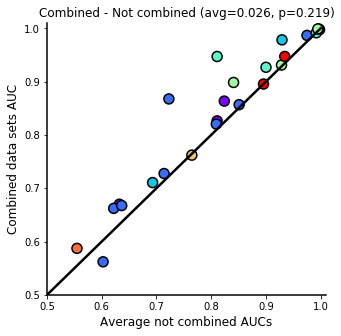

In [46]:
##### comparing the combined with the non combined studies
# # merge the 'select_dataset_summary' with the 'summary_w_metadata'
comb_notcomb_comparison_df = select_dataset_summary.append(summary_w_metadata)
comb_notcomb_comparison_df = comb_notcomb_comparison_df.sort_values('study').drop(columns=['Instrument_category','significant', 'Instument', 'column','mode', 'test_size', 'train_size', 'type', 'samples'])
comb_notcomb_comparison_df.replace('ST000063', 'ST000062', inplace=True)

not_combined = ['Feng', 'MTBLS253', 'MTBLS124', 'MTBLS352', 'MTBLS579','MTBLS92', 'ST000062',
                'ST000284', 'ST000381', 'ST000383','ST000396', 'ST000865', 'ST000918', 'ST000888']
comb_notcomb_comparison_df = comb_notcomb_comparison_df[~comb_notcomb_comparison_df.study.isin(not_combined)]
# sorting the data to get diseases next to each other and then subcategories (cancer types) together
comparison_df = comb_notcomb_comparison_df.sort_values(by=['disease_type'])
comparison_df.disease = comparison_df.disease.str.lower()
comparison_df.replace('lung cancer - adenocarcinoma', 'lung cancer', inplace=True)
types = comparison_df.disease_type.unique()
df_list = []
for dis_type in types:
    sub_df = comparison_df[comparison_df.disease_type == dis_type].sort_values(by=['disease'])
    diseases = comparison_df[comparison_df.disease_type == dis_type].disease.unique()
    for dis in diseases:
        df_list.append(sub_df[sub_df.disease == dis].sort_values(by=['study']))
comparison_df = pd.concat(df_list)
comparison_df = comparison_df.reset_index()
comparison_df  = df_naming_cleanup(comparison_df)
# # THIS IS THE DF WE WANT TO PLOT
studies = comparison_df.study.unique()

disease_types_unique = comparison_df.disease_type.unique()
color_fractions = {i:int(i)/(len(disease_types_unique)-1) for i in range(len(disease_types_unique))}
disease_types = list(comparison_df.disease_type)
# print(disease_types_unique)
disease_to_num = {disease:i for i,disease in enumerate(sorted(disease_types_unique))}
cmap = matplotlib.cm.get_cmap('rainbow')
disease_to_color_legend = {disease:cmap(color_fractions[disease_to_num[disease]]) for disease in disease_to_num}
colors = []

combined_auc = []
not_combined_auc = []
for study in studies:
    study_df = comparison_df[comparison_df.study == study]
    study_disease = list(study_df.disease_type)
    colors.append(disease_to_color_legend[study_disease[0]])
    analysis = study_df.analysis
    combined = []
    not_combined = []
    for a in analysis:
        if 'reprocessed' in a or 'author' in a:
            combined.append(list(study_df[study_df.analysis == a].auc)[0])
        else:
            not_combined.append(list(study_df[study_df.analysis == a].auc)[0])
    combined = np.asarray(combined)
    not_combined = np.asarray(not_combined)
    combined_auc.append(combined.mean())
    not_combined_auc.append(not_combined.mean())
fig2 = plt.figure(figsize=(5,5))
ax2 = plt.subplot()
ax2.set_ylim([0.5,1.01])
ax2.set_xlim([0.5,1.01])
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.plot([0.5,1],[0.5,1], 'k', linewidth=2.5)
ax2.set_ylabel('Combined data sets AUC',fontname='Dejavu Sans', fontsize=12)
ax2.set_xlabel('Average not combined AUCs',fontname='Dejavu Sans', fontsize=12)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
diff = np.asarray(combined_auc) - np.asarray(not_combined_auc)
mean = diff.mean()
_, p = mannwhitneyu(not_combined_auc, combined_auc)
ax2.set_title('Combined - Not combined (avg={:.3f}, p={:.3f})'.format(mean, p))
ax2.scatter(not_combined_auc, combined_auc,c=colors, marker='o', s=100, alpha=1, linewidth=1.5,edgecolor='k')
plt.savefig('Fig3a_combined_v_not_combined_AUCs_lineplot.svg', format='svg', dpi=1000)

In [1]:
all_data = pd.read_csv('./paper_models_csvs_pkls/summary-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_auc_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo_YES_meta.csv').sort_values('study')
all_data = all_data[all_data.analysis.isin(analysis_to_keep)].replace('ST000389', 'ST000388')

all_data

GC = []
LC = []
for a, feat, inst in zip(all_data.analysis, all_data.features, all_data.Instrument_category):
    if ('XCMS' in a or 'IPO' in a or 'reprocessed' in a):
        if 'LC' in inst:
            LC.append(feat)
        else:
            GC.append(feat)
fig = plt.figure(figsize=(5,4))
ax2 = plt.subplot()
sub_LC = []
for i in range(13):
    place = random.randint(0,len(LC))
    sub_LC.append(LC[place])
LC = sub_LC

_, p = mannwhitneyu(GC, LC)

parts = ax2.violinplot([GC,LC], [1,2], widths=0.5, showmeans=True, showextrema=False)
set_plot_features(ax2, parts, i=1)
ax2.xaxis.set_ticks(np.arange(1, 3, 1))
ax2.set_title('GC vs. LC number of features , p={:4.3e}'.format(p), fontname='Dejavu Sans', fontsize=14)
ax2.set_xticklabels(['GC ({})'.format(len(GC)), 'LC ({})'.format(len(LC))], rotation=0, fontname='Dejavu Sans', fontsize=12)
random_x_1 = np.random.normal(scale=0.05, size=len(GC)) + 1 
random_x_2 = np.random.normal(scale=0.05, size=len(LC)) + 2 
ax2.scatter(random_x_1,GC, facecolor='k', edgecolor='w')
ax2.scatter(random_x_2,LC,facecolor='k', edgecolor='w')

plt.tight_layout()
plt.savefig('SI_LC_v_GC_features_random_13_5.svg'.format(analysis_type), format='svg', dpi=1000, bbox_inches='tight')
plt.show()

NameError: name 'pd' is not defined